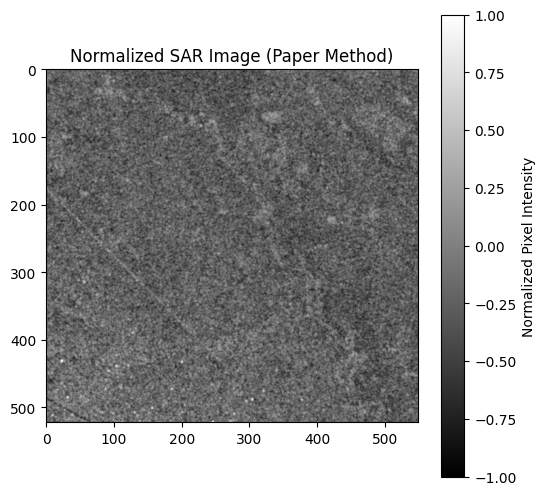

In [5]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load .tif file
tif_path = "/home/alex/Desktop/miniproject/archive/sen12flood/sen12floods_s1_source/sen12floods_s1_source/sen12floods_s1_source_0_2019_03_13/VV.tif"

with rasterio.open(tif_path) as src:
    image = src.read(1).astype(np.float32)  # Read the first band

# Apply log transformation as per the paper
image = 10 * np.log10(image + 1e-6) + 50  # Avoid log(0) issue

# Normalize to range [-1,1]
image = (image - np.min(image)) / (np.max(image) - np.min(image))  # Scale to [0,1]
image = (image * 2) - 1  # Scale to [-1,1]

# Display image
plt.figure(figsize=(6,6))
plt.imshow(image, cmap="gray")
plt.colorbar(label="Normalized Pixel Intensity")
plt.title("Normalized SAR Image (Paper Method)")
plt.show()


In [ ]:
import os
import random

# Set the directories relative to the working directory
labels_dir = 'sen12floods_s1_labels'
source_dir = 'sen12floods_s1_source'

# List and sort the label files for reproducibility
label_files = sorted(os.listdir(labels_dir))

# Shuffle and select half of the files
random.shuffle(label_files)
num_to_delete = len(label_files) // 2
files_to_delete = label_files[:num_to_delete]

for filename in files_to_delete:
    label_path = os.path.join(labels_dir, filename)
    source_path = os.path.join(source_dir, filename)
    
    # Delete label file
    if os.path.exists(label_path):
        os.remove(label_path)
        print(f"Deleted label: {label_path}")
    else:
        print(f"Label file not found: {label_path}")
        
    # Delete corresponding source file
    if os.path.exists(source_path):
        os.remove(source_path)
        print(f"Deleted source: {source_path}")
    else:
        print(f"Source file not found: {source_path}")